In [6]:
from typing import Tuple, Dict, Any, Optional, List
from collections import OrderedDict
import pyrogram.types
from pyrogram.types import Message, User, Chat, MessageReactions, Reaction
from pyrogram.enums import ChatType, MessageMediaType
import os
import pyrogram
from pymongo import MongoClient
from enum import Enum
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
NullFormatter = ticker.NullFormatter

MONGO_HOST="mongodb://127.0.0.1:27017/"
MONGO_INITDB_ROOT_USERNAME="root"
MONGO_INITDB_ROOT_PASSWORD="example"
MONGO_DATABASE="messages_new"

conn = MongoClient(MONGO_HOST, username=MONGO_INITDB_ROOT_USERNAME, password=MONGO_INITDB_ROOT_PASSWORD)
db = conn[MONGO_DATABASE]
messages = db["messages"]

In [9]:
messages.count_documents({
    "date": {
        "$gte": datetime.datetime(2010, 1, 1),
        "$lt": datetime.datetime(2025, 1, 2)
    }
})

64230

In [98]:
result = messages.aggregate([
    {
        '$group': {
            '_id': {
                'chat_id': '$chat.id', 
                'chat_title': '$chat.title'
            }
        }
    }
])
result = [x["_id"] for x in result]
channels = {x["chat_id"]: x["chat_title"] for x in result}
print(channels)

{-1001547165686: 'NEUTRINO', -1001475338667: 'מיכאל שמש', -1001194785331: 'כאן 11 | דסק ערבים פלסטינים', -1001683457734: 'Sirat | صِراط', -1001446968422: 'ללא צנזורה חדשות ישראל בטלגרם', -1001873312329: '🔞🛑מלחמה על הבית🛑🔞', -1001970614754: 'میلیتاری در پارسی', -1001436772127: 'צופר - צבע אדום', -1001908602156: 'Military Times🎖', -1001406113886: 'חדשות מהשטח בטלגרם', -1001132293108: 'خبر سپاه پاسداران', -1001170925964: 'محمد مهدی بابایی', -1001342537743: 'اخبار امنیتی - نظامى', -1001521365878: 'ללא גבולות ⚠️', -1001020219579: '🇮🇷Defenders IRAN🇮🇷', -1001277927787: 'עמאר אסדי - amar assadi news', -1001143765178: 'אבו עלי אקספרס', -1001561122816: 'יהודים מדווחים - הערוץ הרשמי', -1001459243295: 'GENERAL', -1001952721314: 'בז news - חדשות צבא וביטחון', -1001207026910: 'INTELLITIMES | إنتل تايمز | אינטלי טיימס', -1001001539027: '◾کانال سپاه قدس', -1001944652421: 'אלמוג בוקר עדכונים', -1001418326022: 'دانشگاه افسری پلیس 🇮🇷', -1001675223741: 'סוכנות החדשות 🎗', -1001249623057: 'کاتافراکت', -1001

In [101]:
# find channels with arabic letters
arabic_letters = "ابتثجحخدذرزسشصضطظعغفقكلمنهوي"
arabic_channels = {}
for channel_id, channel_name in channels.items():
    if any(letter in arabic_letters for letter in channel_name):
        arabic_channels[channel_id] = channel_name

print(arabic_channels)

{-1001683457734: 'Sirat | صِراط', -1001970614754: 'میلیتاری در پارسی', -1001132293108: 'خبر سپاه پاسداران', -1001170925964: 'محمد مهدی بابایی', -1001342537743: 'اخبار امنیتی - نظامى', -1001207026910: 'INTELLITIMES | إنتل تايمز | אינטלי טיימס', -1001001539027: '◾کانال سپاه قدس', -1001418326022: 'دانشگاه افسری پلیس 🇮🇷', -1001249623057: 'کاتافراکت', -1001294915724: '🇮🇷 یه جای خاص 🇮🇷', -1001628243607: '\u200c\u200cساندیس میم | SANDIS MEME', -1001953086336: 'پرایتوری 🕊', -1001346732056: 'اسکواد ایران | Squad Iran', -1001855522803: '🔸کیسان ابوعمره🔸', -1001117292289: 'افـــسر جنـــگ نـــرم', -1001373818759: 'اخبار نظامی ایران و جهان', -1001960770844: 'אלעאלם אלערבי-العالم العربي| ערן מלכא', -1001006165084: '🎬 بیسیمچی مدیا', -1001435013468: 'مطالعات رژیم صهیونیستی 🇵🇸', -1001018424368: 'جنگاوران', -1001008407570: 'Partisan / پارتیزان', -1001592257625: 'پارتیزان پلاس', -1002136406625: 'WAR ROOM | اتاق جنگ', -1001050775424: '🇮🇷وقایع الاتفاقیه نظامی🇮🇷', -1001251718534: 'سپاه سایبری پاسداران IRGC🚩'

In [102]:
hebrew_letters = "אבגדהוזחטיכלמנסעפצקרשתץףךןם"
hebrew_channels = {}
for channel_id, channel_name in channels.items():
    if any(letter in hebrew_letters for letter in channel_name):
        hebrew_channels[channel_id] = channel_name

print(hebrew_channels)

{-1001475338667: 'מיכאל שמש', -1001194785331: 'כאן 11 | דסק ערבים פלסטינים', -1001446968422: 'ללא צנזורה חדשות ישראל בטלגרם', -1001873312329: '🔞🛑מלחמה על הבית🛑🔞', -1001436772127: 'צופר - צבע אדום', -1001406113886: 'חדשות מהשטח בטלגרם', -1001521365878: 'ללא גבולות ⚠️', -1001277927787: 'עמאר אסדי - amar assadi news', -1001143765178: 'אבו עלי אקספרס', -1001561122816: 'יהודים מדווחים - הערוץ הרשמי', -1001952721314: 'בז news - חדשות צבא וביטחון', -1001207026910: 'INTELLITIMES | إنتل تايمز | אינטלי טיימס', -1001944652421: 'אלמוג בוקר עדכונים', -1001675223741: 'סוכנות החדשות 🎗', -1001192694517: 'ניוזדסק ישראל', -1001985312884: 'Israel News 24/7 - חדשות אמת', -1001474443960: 'מבזקי רעם - מבזקי חדשות בזמן אמת', -1001936461077: 'חדשות אונליין', -1001401013486: '🔸ידיעות בני ברק🔸', -1001425850587: 'אבו צאלח הדסק הערבי', -1001848822478: '🔥מרכבות האש🔥 - דיווחים בזמן אמת', -1001375169718: 'מסביב לעולם - Around the World', -1001960770844: 'אלעאלם אלערבי-العالم العربي| ערן מלכא', -1001731396712: "חדשות

In [104]:
channel_ids_selection = list(arabic_channels.keys())# + list(hebrew_channels.keys())

In [63]:
cursor = messages.find({
    "date": {
        "$gte": datetime.datetime(2010, 1, 1),
        #"$lt": datetime.datetime(2024, 1, 2)
    }
}, {"date": 1})

# Create a DataFrame from the cursor
df = pd.DataFrame(list(cursor)).drop(columns='_id')

# Ensure the 'date' field is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set the datetime column as the DataFrame's index
df.set_index('date', inplace=True)

# Resample the data by week and count the number of entries
weekly_counts = df.resample('W').size().reset_index(name='cnt')


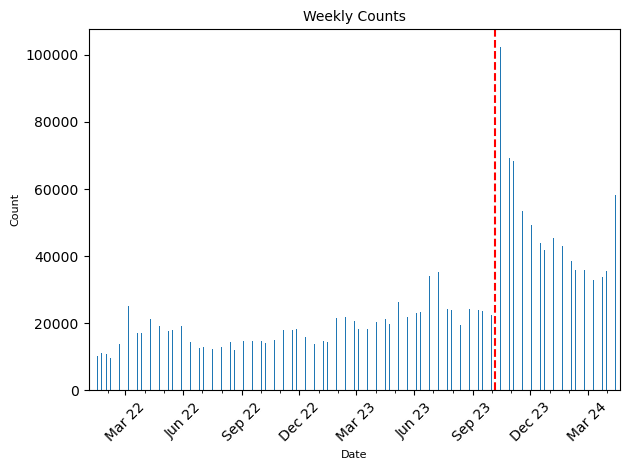

In [67]:
weekly_counts_trimmed = weekly_counts[weekly_counts.date.dt.year >= 2022]
first_weekday = weekly_counts_trimmed.iloc[0].date.weekday()
plt.bar(weekly_counts_trimmed.date, weekly_counts_trimmed.cnt, width=1)
plt.xticks(rotation=45)

# Set the x-axis labels to display the first week of each quarter
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_formatter(NullFormatter())

# mark 7.10.23 on graph
plt.axvline(x=pd.Timestamp('2023-10-07'), color='r', linestyle='--')

plt.xlim(weekly_counts_trimmed.date.min(), weekly_counts_trimmed.date.max())

plt.title('Weekly Counts', fontsize=10)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()

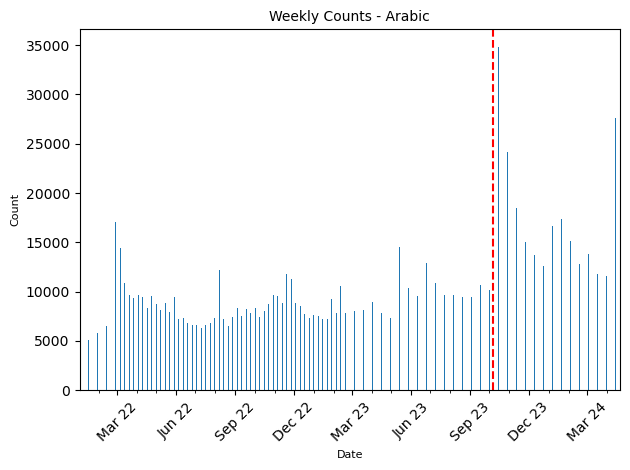

In [105]:
cursor = messages.find({
    "chat.id": {
        "$in": channel_ids_selection
    },
    "date": {
        "$gte": datetime.datetime(2010, 1, 1),
        #"$lt": datetime.datetime(2024, 1, 2)
    }
}, {"date": 1})


# Create a DataFrame from the cursor
df = pd.DataFrame(list(cursor)).drop(columns='_id')

# Ensure the 'date' field is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set the datetime column as the DataFrame's index
df.set_index('date', inplace=True)

# Resample the data by week and count the number of entries
weekly_counts = df.resample('W').size().reset_index(name='cnt')

weekly_counts_trimmed = weekly_counts[weekly_counts.date.dt.year >= 2022]
first_weekday = weekly_counts_trimmed.iloc[0].date.weekday()
plt.bar(weekly_counts_trimmed.date, weekly_counts_trimmed.cnt, width=1)
plt.xticks(rotation=45)

# Set the x-axis labels to display the first week of each quarter
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_formatter(NullFormatter())

# mark 7.10.23 on graph
plt.axvline(x=pd.Timestamp('2023-10-07'), color='r', linestyle='--')

plt.xlim(weekly_counts_trimmed.date.min(), weekly_counts_trimmed.date.max())

plt.title('Weekly Counts - Arabic', fontsize=10)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()


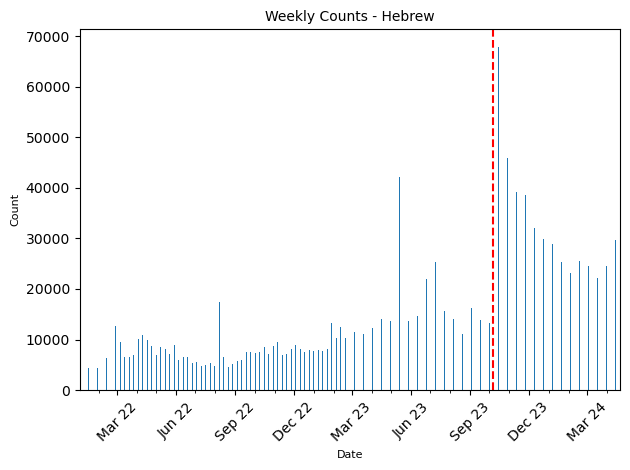

In [106]:
cursor = messages.find({
    "chat.id": {
        "$in": list(hebrew_channels.keys())
    },
    "date": {
        "$gte": datetime.datetime(2010, 1, 1),
        #"$lt": datetime.datetime(2024, 1, 2)
    }
}, {"date": 1})


# Create a DataFrame from the cursor
df = pd.DataFrame(list(cursor)).drop(columns='_id')

# Ensure the 'date' field is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set the datetime column as the DataFrame's index
df.set_index('date', inplace=True)

# Resample the data by week and count the number of entries
weekly_counts = df.resample('W').size().reset_index(name='cnt')

weekly_counts_trimmed = weekly_counts[weekly_counts.date.dt.year >= 2022]
first_weekday = weekly_counts_trimmed.iloc[0].date.weekday()
plt.bar(weekly_counts_trimmed.date, weekly_counts_trimmed.cnt, width=1)
plt.xticks(rotation=45)

# Set the x-axis labels to display the first week of each quarter
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_formatter(NullFormatter())

# mark 7.10.23 on graph
plt.axvline(x=pd.Timestamp('2023-10-07'), color='r', linestyle='--')

plt.xlim(weekly_counts_trimmed.date.min(), weekly_counts_trimmed.date.max())

plt.title('Weekly Counts - Hebrew', fontsize=10)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()
